In [1]:
!pip install ultralytics

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ----------------------------- ---------- 0.8/1.1 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 2.3 MB/s  0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/6.2 MB 2.4 MB/s eta 0:00:03
   -------- ------------------------------- 1.3/6.2 MB 2.2 MB/s eta 0:00:03
   -------- ------------------------------- 1.3/6.2 MB 2.2 MB/s eta 0:00:03
   ----------- ---------------------------- 1.8/6.2 MB 1.9 MB/s eta 0:00:03
   ------------- -------------------------- 2.1/6.2 MB 1.7 MB/s eta 0:00:03
   --------------- ------------------------ 2.4/6.2 MB 1.6 MB/s eta 0:00:03
   ---------------- ----------------------- 2.6/6.

In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\gorod\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
model = YOLO('yolov8n.pt')

In [4]:
import cv2
import os
import numpy as np

In [15]:
def detect_people_yolo(bgr_image):

    image_rgb = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    # start = time.perf_counter()
    results = model(image_rgb, classes=0, verbose=False)
    # end = time.perf_counter()
    # detection_time = end - start
    image_output = bgr_image.copy()
    
    if not results or not results[0].boxes:
        y_pred = 0
        return image_output, y_pred
    
    detections = results[0].boxes.xyxy.cpu().numpy() # Получаем координаты (x1, y1, x2, y2)
    confidences = results[0].boxes.conf.cpu().numpy() # Получаем уверенность
    
    count = 0
    for box, conf in zip(detections, confidences):
        x1, y1, x2, y2 = map(int, box)
        
        if conf > 0.5: 
            cv2.rectangle(image_output, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            label = f"Person: {conf:.2f}"
            cv2.putText(image_output, label, (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            count += 1
            
    y_pred = 1
    return image_output, y_pred

In [16]:
import os

pos_img_path = 'additional/person/Pos/'
neg_img_path ='additional/person/Neg/'
out_path = 'additional/person/Res/'

pos_images = os.listdir(pos_img_path)
neg_images = os.listdir(neg_img_path)

y = []
y_pred = []


for pos_image in pos_images:

    img = cv2.imread(pos_img_path + pos_image)
    img_res, pred = detect_people_yolo(img)
    y.append(1)
    y_pred.append(pred)
    cv2.imwrite(out_path + 'res_' + pos_image, img_res)

for neg_image in neg_images:

    img = cv2.imread(neg_img_path + neg_image)
    img_res, pred = detect_people_yolo(img)
    y.append(0)
    y_pred.append(pred)    
    cv2.imwrite(out_path + 'res_' + neg_image, img_res)

y = np.array(y)
y_pred = np.array(y_pred)

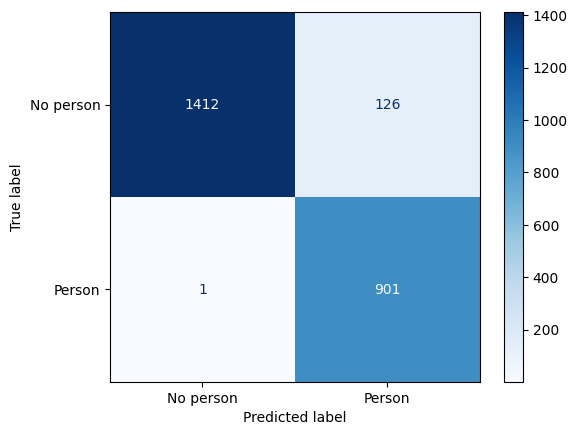

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No person', 'Person'])
disp.plot(cmap='Blues')
plt.show()

In [18]:
acc

0.9479508196721311

In [19]:
prec

0.8773125608568647

In [20]:
rec

0.9988913525498891

In [21]:
f1

0.9341627786417833